# Define Training Ratios to Check

In [3]:
import numpy as np

train_ratio = np.arange(0.1, 1.0, 0.1)
train_ratio

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Define Helper Functions

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [19]:
def accuracy(y_true, y_pred, func=np.rint):
    
    y_pred = func(y_pred).astype(int)
    good_pred = (y_true == y_pred).astype(int)
    
    return np.mean(good_pred)

# Import the Dataset (w/ outliers)

In [1]:
import pandas as pd

df = pd.read_csv('./dat/cicy3o_tidy.csv')

# Extract Matrix and Labels

In [2]:
matrix  = df.filter(regex='^matrix_.*')
h11     = df['h11'].values.reshape(-1,)
h21     = df['h21'].values.reshape(-1,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

train_accuracy_h11 = []
train_accuracy_h21 = []
test_accuracy_h11 = []
test_accuracy_h21 = []

for r in train_ratio:
    matrix_train, matrix_test, h11_train, h11_test, h21_train, h21_test= train_test_split(matrix, h11, h21, train_size=r, shuffle=True, random_state=42)

    svr_rbf_h11 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)
    svr_rbf_h21 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)

    svr_rbf_h11.fit(matrix_train, h11_train)
    svr_rbf_h21.fit(matrix_train, h21_train)

    h11_train_pred = svr_rbf_h11.predict(matrix_train)
    h21_train_pred = svr_rbf_h21.predict(matrix_train)

    acc_h11 = accuracy(h11_train, h11_train_pred, np.rint)
    train_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_train, h21_train_pred, np.rint)
    train_accuracy_h21.append(acc_h21)

    h11_test_pred = svr_rbf_h11.predict(matrix_test)
    h21_test_pred = svr_rbf_h21.predict(matrix_test)

    acc_h11 = accuracy(h11_test, h11_test_pred, np.rint)
    test_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_test, h21_test_pred, np.rint)
    test_accuracy_h21.append(acc_h21)

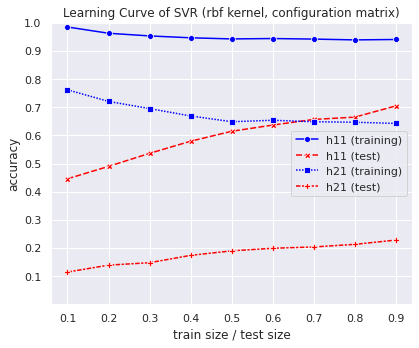

In [7]:
accur = pd.DataFrame({'h11_train':   train_accuracy_h11,
                      'h11_test':    test_accuracy_h11,
                      'h21_train':   train_accuracy_h21,
                      'h21_test':    test_accuracy_h21
                     }, index=train_ratio)

_, ax = plt.subplots(1,1, figsize=(6,5))

sns.lineplot(data=accur,
             markers=True,
             palette=['blue', 'red', 'blue', 'red'],
             ax=ax
            )
ax.set(title='Learning Curve of SVR (rbf kernel, configuration matrix)',
       xlabel='train size / test size',
       ylabel='accuracy',
       ylim=(0.0,1.0),
       yticks=np.arange(0.1, 1.1, 0.1)
      )
ax.legend(['h11 (training)', 'h11 (test)', 'h21 (training)', 'h21 (test)'])

plt.tight_layout()
plt.savefig('./svr_learning_curve_matrix.pdf', dpi=150, format='pdf')

# Import Dataset (w/o outliers)

In [8]:
import pandas as pd

df = pd.read_csv('./dat/cicy3o_full.csv')

# Extract Matrix and Labels

In [9]:
matrix  = df.filter(regex='^matrix_.*')
h11     = df['h11'].values.reshape(-1,)
h21     = df['h21'].values.reshape(-1,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

train_accuracy_h11 = []
train_accuracy_h21 = []
test_accuracy_h11 = []
test_accuracy_h21 = []

for r in train_ratio:
    matrix_train, matrix_test, h11_train, h11_test, h21_train, h21_test= train_test_split(matrix, h11, h21, train_size=r, shuffle=True, random_state=42)

    svr_rbf_h11 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)
    svr_rbf_h21 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)

    svr_rbf_h11.fit(matrix_train, h11_train)
    svr_rbf_h21.fit(matrix_train, h21_train)

    h11_train_pred = svr_rbf_h11.predict(matrix_train)
    h21_train_pred = svr_rbf_h21.predict(matrix_train)

    acc_h11 = accuracy(h11_train, h11_train_pred, np.rint)
    train_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_train, h21_train_pred, np.rint)
    train_accuracy_h21.append(acc_h21)

    h11_test_pred = svr_rbf_h11.predict(matrix_test)
    h21_test_pred = svr_rbf_h21.predict(matrix_test)

    acc_h11 = accuracy(h11_test, h11_test_pred, np.rint)
    test_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_test, h21_test_pred, np.rint)
    test_accuracy_h21.append(acc_h21)

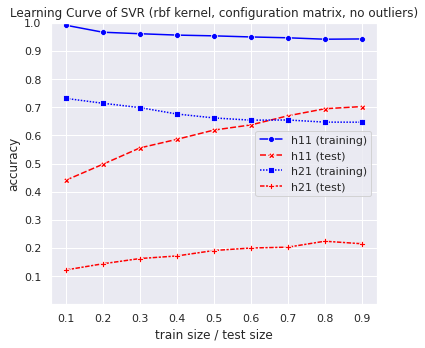

In [13]:
accur = pd.DataFrame({'h11_train':   train_accuracy_h11,
                      'h11_test':    test_accuracy_h11,
                      'h21_train':   train_accuracy_h21,
                      'h21_test':    test_accuracy_h21
                     }, index=train_ratio)

_, ax = plt.subplots(1,1, figsize=(6,5))

sns.lineplot(data=accur,
             markers=True,
             palette=['blue', 'red', 'blue', 'red'],
             ax=ax
            )
ax.set(title='Learning Curve of SVR (rbf kernel, configuration matrix, no outliers)',
       xlabel='train size / test size',
       ylabel='accuracy',
       ylim=(0.0,1.0),
       yticks=np.arange(0.1, 1.1, 0.1)
      )
ax.legend(['h11 (training)', 'h11 (test)', 'h21 (training)', 'h21 (test)'])

plt.tight_layout()
plt.savefig('./svr_learning_curve_matrix_noout.pdf', dpi=150, format='pdf')

# Use Engineered Features and PCA

In [16]:
eng_h11 = df.filter(regex='^num_cp$|^dim_cp.*|^pca.*')
eng_h21 = df.filter(regex='^num_cp$|^dim_cp.*|^dim_h0_amb.*|^pca.*')

In [17]:
train_accuracy_h11 = []
train_accuracy_h21 = []
test_accuracy_h11 = []
test_accuracy_h21 = []

for r in train_ratio:
    eng_h11_train, eng_h11_test, eng_h21_train, eng_h21_test, h11_train, h11_test, h21_train, h21_test= train_test_split(eng_h11, eng_h21, h11, h21, train_size=r, shuffle=True, random_state=42)

    svr_rbf_h11 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)
    svr_rbf_h21 = SVR(kernel='rbf', gamma='scale', C=20, epsilon=0.1)

    svr_rbf_h11.fit(eng_h11_train, h11_train)
    svr_rbf_h21.fit(eng_h21_train, h21_train)

    h11_train_pred = svr_rbf_h11.predict(eng_h11_train)
    h21_train_pred = svr_rbf_h21.predict(eng_h21_train)

    acc_h11 = accuracy(h11_train, h11_train_pred, np.rint)
    train_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_train, h21_train_pred, np.rint)
    train_accuracy_h21.append(acc_h21)

    h11_test_pred = svr_rbf_h11.predict(eng_h11_test)
    h21_test_pred = svr_rbf_h21.predict(eng_h21_test)

    acc_h11 = accuracy(h11_test, h11_test_pred, np.rint)
    test_accuracy_h11.append(acc_h11)
    acc_h21 = accuracy(h21_test, h21_test_pred, np.rint)
    test_accuracy_h21.append(acc_h21)

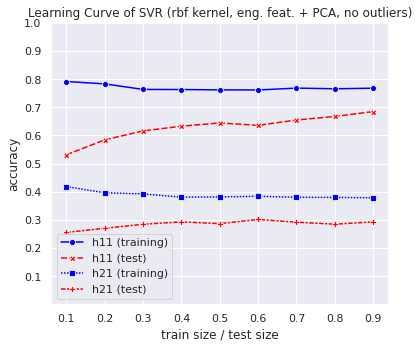

In [18]:
accur = pd.DataFrame({'h11_train':   train_accuracy_h11,
                      'h11_test':    test_accuracy_h11,
                      'h21_train':   train_accuracy_h21,
                      'h21_test':    test_accuracy_h21
                     }, index=train_ratio)

_, ax = plt.subplots(1,1, figsize=(6,5))

sns.lineplot(data=accur,
             markers=True,
             palette=['blue', 'red', 'blue', 'red'],
             ax=ax
            )
ax.set(title='Learning Curve of SVR (rbf kernel, eng. feat. + PCA, no outliers)',
       xlabel='train size / test size',
       ylabel='accuracy',
       ylim=(0.0,1.0),
       yticks=np.arange(0.1, 1.1, 0.1)
      )
ax.legend(['h11 (training)', 'h11 (test)', 'h21 (training)', 'h21 (test)'])

plt.tight_layout()
plt.savefig('./svr_learning_curve_pca_noout.pdf', dpi=150, format='pdf')